In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## Diabetes Prediction dataset where the outcome the label represents whether diabetes is present (1) or not(0)

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Defining features, outcome and scaling the features

In [3]:
x = df.drop(columns = ['Outcome'])
y = df['Outcome']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

## Splitting the data into 80% train and 20% test

In [4]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.2,random_state = 42)

## Fitting various classification models

In [5]:
models={"Logistic regresion": LogisticRegression(),
        "Decision Tree Classifier": DecisionTreeClassifier(),
        "Bagging": BaggingClassifier(),
        "Random forest": RandomForestClassifier(),
        "AdaBoost": AdaBoostClassifier(),
        "Gradient Boosting":GradientBoostingClassifier(),
        "SVM": SVC(kernel='rbf')}
for name,model in models.items():
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  print(f"\n {name} accuracy: {acc:4f}")


 Logistic regresion accuracy: 0.753247

 Decision Tree Classifier accuracy: 0.753247

 Bagging accuracy: 0.733766

 Random forest accuracy: 0.766234

 AdaBoost accuracy: 0.779221

 Gradient Boosting accuracy: 0.740260

 SVM accuracy: 0.727273


## Peforming PCA to reduce feature space and plot the decision boundaries

In [6]:
pca=PCA(n_components=2)
X_pca=pca.fit_transform(x)
X_train1,X_test1,y_train1,y_test1=train_test_split(X_pca,y,test_size=0.2,random_state=42)
models={"Logistic regresion": LogisticRegression(),
        "Decision Tree Classifier": DecisionTreeClassifier(),
        "Bagging": BaggingClassifier(),
        "Random forest": RandomForestClassifier(),
        "AdaBoost": AdaBoostClassifier(),
        "Gradient Boosting":GradientBoostingClassifier(),
        "SVM": SVC(kernel='rbf')}
for name,model in models.items():
  model.fit(X_train1,y_train1)
  y_pred1 = model.predict(X_test1)
  acc=accuracy_score(y_test1,y_pred1)
  print(f"\n {name} accuracy: {acc:4f}")
  print("\nClassification Report :\n",classification_report(y_test1,y_pred1))


 Logistic regresion accuracy: 0.733766

Classification Report :
               precision    recall  f1-score   support

           0       0.76      0.85      0.80        99
           1       0.66      0.53      0.59        55

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.69       154
weighted avg       0.73      0.73      0.73       154


 Decision Tree Classifier accuracy: 0.629870

Classification Report :
               precision    recall  f1-score   support

           0       0.73      0.67      0.70        99
           1       0.48      0.56      0.52        55

    accuracy                           0.63       154
   macro avg       0.61      0.62      0.61       154
weighted avg       0.64      0.63      0.64       154


 Bagging accuracy: 0.714286

Classification Report :
               precision    recall  f1-score   support

           0       0.77      0.79      0.78        99
           1       0.60      0.58      0.59 

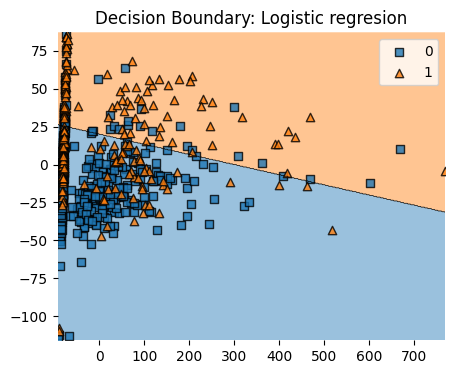

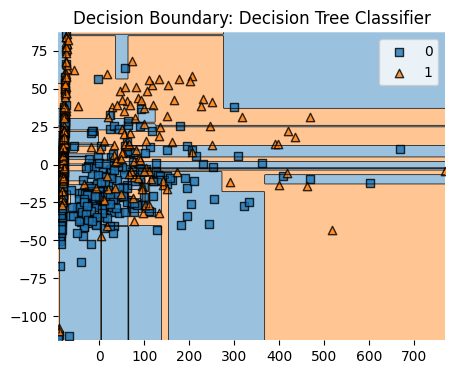

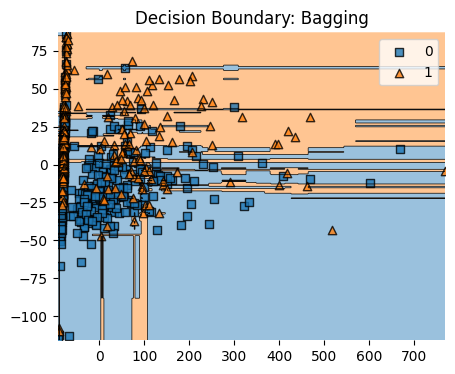

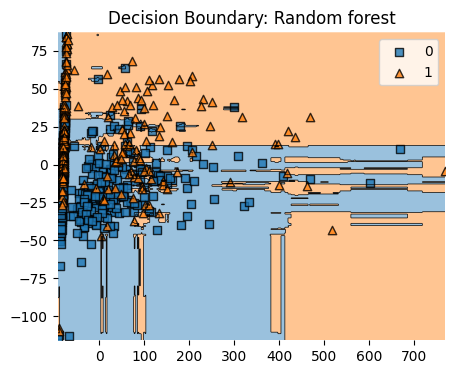

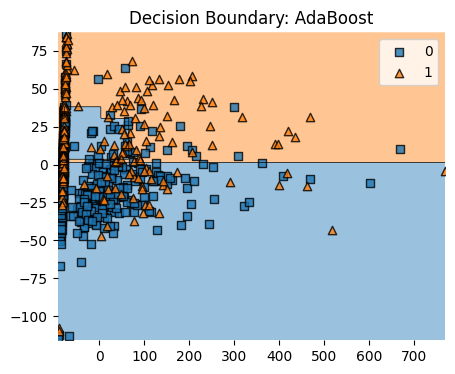

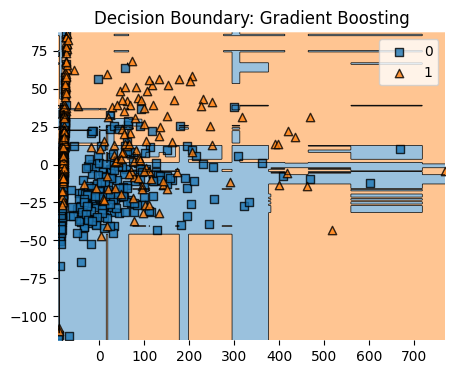

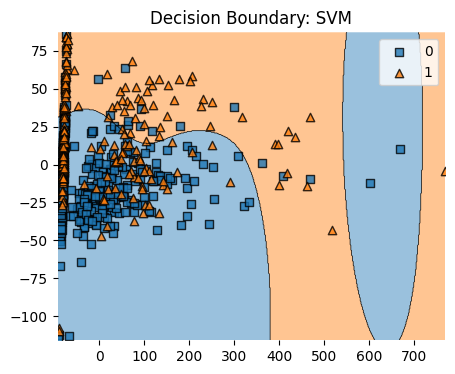

In [7]:
for name,model in models.items():
  if X_pca.shape[1]==2:
    plt.figure(figsize=(5,4))
    plot_decision_regions(X_train1,y_train1.to_numpy(),clf=model,legend=2)
    plt.legend(loc='upper right')
    plt.title(f"Decision Boundary: {name}")
    plt.show()

## Hyperparameter tuning for improving the models

In [8]:
models = {
    "Logistic Regression": (LogisticRegression(),
        {'C': [0.00001, 0.1, 1, 10],
        'max_iter': [10, 500, 1000]}),
    "SVM": (SVC(kernel='rbf'),
        {'C': [0.1, 1, 10],
         'gamma': ['scale', 0.01, 0.001]
        }),
    "Decision Tree Classifier": (
        DecisionTreeClassifier(),
        {'max_depth': [None, 5, 10, 20],
          'min_samples_split': [2, 5, 10]}),
    "Bagging": (BaggingClassifier(),
        {'n_estimators': [10, 50, 100],
          'max_samples': [0.5, 1.0]}),
    "Random Forest": (
        RandomForestClassifier(),
        {'n_estimators': [50, 100],
         'max_depth': [None, 10, 20],
          'min_samples_split': [2, 5]}),
    "AdaBoost": (
        AdaBoostClassifier(),
        {'n_estimators': [50, 100],
            'learning_rate': [0.5, 1.0] }),
    "Gradient Boosting": (
        GradientBoostingClassifier(),
        {'n_estimators': [50, 100],
         'learning_rate': [0.01, 0.1],
          'max_depth': [3, 5]
        })
}

# Run grid search for each
for name, (model, params) in models.items():
    print(f"\n Tuning: {name}")
    grid = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(x_train, y_train)
    print(f"Best Accuracy: {grid.best_score_:.4f}")
    print(f"Best Params: {grid.best_params_}")



 Tuning: Logistic Regression
Best Accuracy: 0.7655
Best Params: {'C': 10, 'max_iter': 10}

 Tuning: SVM
Best Accuracy: 0.7671
Best Params: {'C': 1, 'gamma': 0.01}

 Tuning: Decision Tree Classifier
Best Accuracy: 0.7508
Best Params: {'max_depth': 5, 'min_samples_split': 5}

 Tuning: Bagging
Best Accuracy: 0.7801
Best Params: {'max_samples': 0.5, 'n_estimators': 50}

 Tuning: Random Forest
Best Accuracy: 0.7802
Best Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}

 Tuning: AdaBoost
Best Accuracy: 0.7818
Best Params: {'learning_rate': 1.0, 'n_estimators': 100}

 Tuning: Gradient Boosting
Best Accuracy: 0.7802
Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


Before Hyperparameter Tuning:
- Logistic regresion accuracy: 0.753247
- Decision Tree Classier accuracy: 0.75
- Bagging accuracy: 0.733
- Random forest accuracy: 0.766
- AdaBoost accuracy: 0.779221
- Gradient Boosting accuracy: 0.740260
- SVM accuracy: 0.727273

After Hyperparameter Tuning:
- Logistic regresion accuracy: 0.7655
- Decision Tree Classier accuracy: 0.7508
- Bagging accuracy: 0.7801
- Random forest accuracy: 0.7802
- AdaBoost accuracy: 0.7818
- Gradient Boosting accuracy: 0.7802
- SVM accuracy: 0.7671

Therefore, we can conclude that hyperparammeter tuning has improved the classication models